In [1]:
import pandas as pd
import numpy as np
import random

from sklearn.utils import shuffle
import tensorflow as tf
from helpers import one_hot_encode, get_batch, get_training_set, get_test_set, log
from params import HyperParameter

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
file = r'data/fer2013.csv'
df = pd.read_csv(file)

g1 = df.groupby( [ "emotion"] ).count()
g1.head(10)


,pixels,Usage
emotion,,
0,4953,4953
1,547,547
2,5121,5121
3,8989,8989
4,6077,6077
5,4002,4002
6,6198,6198


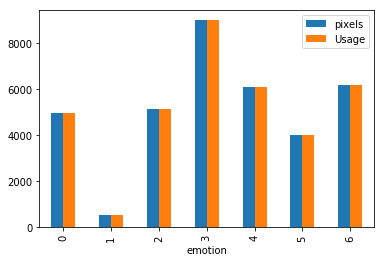

In [5]:
my_plot = g1.plot(kind='bar')

## Data

### Training

In [6]:
df.loc[df['Usage'] == 'Training'].head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


## Test

In [7]:
df.loc[df['Usage'] == 'PublicTest'].head(5)

,emotion,pixels,Usage
28709,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...,PublicTest
28710,1,156 184 198 202 204 207 210 212 213 214 215 21...,PublicTest
28711,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...,PublicTest
28712,6,205 203 236 157 83 158 120 116 94 86 155 180 2...,PublicTest
28713,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...,PublicTest


## Initialize data

In [8]:
train_X, train_y = get_training_set(df.loc[df['Usage'] == 'Training'])
test_X, test_y = get_test_set(df.loc[df['Usage'] == 'PublicTest'])
validate_X, validate_y = get_test_set(df.loc[df['Usage'] == 'PrivateTest'])

## Images

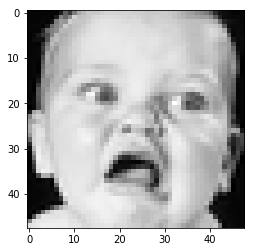

In [9]:
plt.imshow(
    train_X[random.randint(1, train_X.shape[0])].reshape(48, 48),
    cmap='gist_gray')

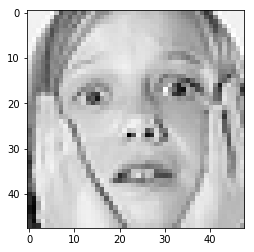

In [10]:
plt.imshow(
    train_X[random.randint(1, train_X.shape[0])].reshape(48, 48),
    cmap='gist_gray')

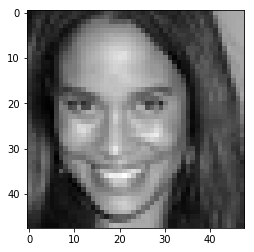

In [11]:
plt.imshow(
    train_X[random.randint(1, train_X.shape[0])].reshape(48, 48),
    cmap='gist_gray')

In [9]:
labels = 7
image_size = 2304

## Linear Classification

### Hyper parameters

In [14]:
params = HyperParameter(
    num_batches=64,
    batch_size=32,
    epoch=1000,
    learning_rate=.5,
    hold_prob=0.5,
    epoch_to_report=50)

log(params)


:  epoch: 1000, num_batches: 64, batch_size: 32, learning_rate: 0.5, hold_prob: (0.5,)


In [15]:
from linear_classifier import LinearClassifer
model = LinearClassifer(params=params, labels=labels, image_size=image_size)

accuracyMap = model.run(
    train_X=train_X,
    train_y=train_y,
    test_X=test_X,
    test_y=test_y,
    validate_X=validate_X,
    validate_y=validate_y)

Epoch:  0
model accuracy:  0.023962106555700302
Epoch:  50
model accuracy:  0.2672053575515747
Epoch:  100
model accuracy:  0.18222345411777496
Epoch:  150
model accuracy:  0.27751463651657104
Epoch:  200
model accuracy:  0.31847310066223145
Epoch:  250
model accuracy:  0.13708554208278656
Epoch:  300
model accuracy:  0.31122875213623047
Epoch:  350
model accuracy:  0.2722206711769104
Epoch:  400
model accuracy:  0.27110615372657776
Epoch:  450
model accuracy:  0.14154361188411713
Epoch:  500
model accuracy:  0.19699080288410187
Epoch:  550
model accuracy:  0.16884925961494446
Epoch:  600
model accuracy:  0.3179158568382263
Epoch:  650
model accuracy:  0.2624686658382416
Epoch:  700
model accuracy:  0.2095291167497635
Epoch:  750
model accuracy:  0.27807188034057617
Epoch:  800
model accuracy:  0.2602396309375763
Epoch:  850
model accuracy:  0.31150737404823303
Epoch:  900
model accuracy:  0.31150737404823303
Epoch:  950
model accuracy:  0.22596824169158936
Final accuracy:  0.268319875

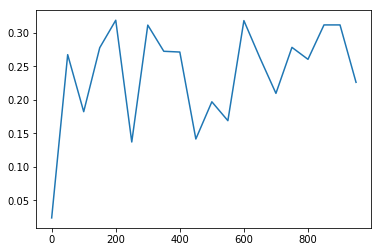

In [17]:
epochs = [int(p) for p in accuracyMap.keys()]
plt.plot(epochs,list(accuracyMap.values()))


## CNN

### Hyper parameters

### Run 1

In [12]:
params = HyperParameter(
    num_batches=64,
    batch_size=32,
    epoch=100,
    learning_rate=.5,
    hold_prob=1.0,
    epoch_to_report=10)

log(params)


:  epoch: 100, num_batches: 64, batch_size: 32, learning_rate: 0.5, hold_prob: (1.0,)


In [13]:
from cnn import CNN
model = CNN(params=params, labels=labels, image_size=image_size)

accuracyMap = model.run(
    train_X=train_X,
    train_y=train_y,
    test_X=test_X,
    test_y=test_y,
    validate_X=validate_X,
    validate_y=validate_y)

Epoch:  0
model accuracy:  0.13011981546878815
Epoch:  10
model accuracy:  0.24937307834625244
Epoch:  20
model accuracy:  0.16912789642810822
Epoch:  30
model accuracy:  0.015603232197463512
Epoch:  40
model accuracy:  0.24937307834625244
Epoch:  50
model accuracy:  0.1382000595331192
Epoch:  60
model accuracy:  0.13011981546878815
Epoch:  70
model accuracy:  0.1819448322057724
Epoch:  80
model accuracy:  0.24937307834625244
Epoch:  90
model accuracy:  0.24937307834625244
Final accuracy:  0.24491502344608307


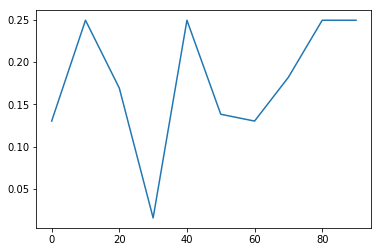

In [14]:
epochs = [int(p) for p in accuracyMap.keys()]
plt.plot(epochs, list(accuracyMap.values()))

### Run 2

In [19]:
params = HyperParameter(
    num_batches=128,
    batch_size=128,
    epoch=100,
    learning_rate=.001,
    hold_prob=.5,
    epoch_to_report=10)

log(params)


:  epoch: 100, num_batches: 128, batch_size: 128, learning_rate: 0.001, hold_prob: (0.5,)


In [20]:
from cnn import CNN
model = CNN(params=params, labels=labels, image_size=image_size)

accuracyMap = model.run(
    train_X=train_X,
    train_y=train_y,
    test_X=test_X,
    test_y=test_y,
    validate_X=validate_X,
    validate_y=validate_y)

Epoch:  0
model accuracy:  0.25494566559791565
Epoch:  10
model accuracy:  0.46781831979751587
Epoch:  20
model accuracy:  0.4984675347805023
Epoch:  30
model accuracy:  0.5107272267341614
Epoch:  40
model accuracy:  0.5190861225128174
Epoch:  50
model accuracy:  0.522986888885498
Epoch:  60
model accuracy:  0.5204792618751526
Epoch:  70
model accuracy:  0.5185288190841675
Epoch:  80
model accuracy:  0.5201293405912941
Epoch:  90
model accuracy:  0.5300562395260789
Final accuracy:  0.5224012789720129


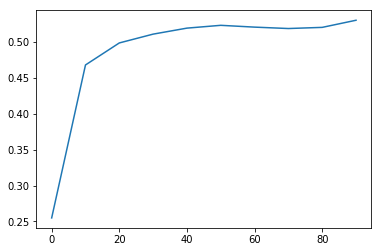

In [23]:
epochs = [int(p) for p in accuracyMap.keys()]
plt.plot(epochs, list(accuracyMap.values()))

### Run 3

In [11]:
params = HyperParameter(
    num_batches=25,
    batch_size=256,
    epoch=500,
    learning_rate=.001,
    hold_prob=.5,
    epoch_to_report=50)

log(params)


:  epoch: 500, num_batches: 25, batch_size: 256, learning_rate: 0.001, hold_prob: (0.5,)


In [12]:
from cnn import CNN
model = CNN(params=params, labels=labels, image_size=image_size)

accuracyMap = model.run(
    train_X=train_X,
    train_y=train_y,
    test_X=test_X,
    test_y=test_y,
    validate_X=validate_X,
    validate_y=validate_y)

Epoch:  0
model accuracy:  0.24519364535808563
Epoch:  50
model accuracy:  0.5093340873718262
Epoch:  100
model accuracy:  0.531345784664154
Epoch:  150
model accuracy:  0.5291167497634888
Epoch:  200
model accuracy:  0.5254945755004883
Epoch:  250
model accuracy:  0.5321816802024841
Epoch:  300
model accuracy:  0.5238227844238281
Epoch:  350
model accuracy:  0.5266090631484985
Epoch:  400
model accuracy:  0.5280022025108337
Epoch:  450
model accuracy:  0.5263304710388184
Final accuracy:  0.5397046804428101


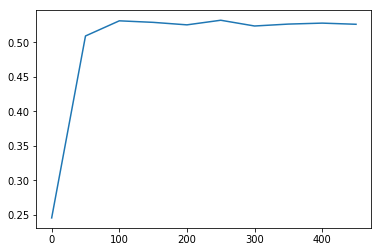

In [13]:
epochs = [int(p) for p in accuracyMap.keys()]
plt.plot(epochs, list(accuracyMap.values()))